# Baseline Model

## Importamos el csv de "Data Cleaning"

In [1]:
from gensim.models import Word2Vec
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
import numpy as np

In [2]:
data = pd.read_csv('../../cyberbullying/data/data.csv')

In [3]:
data.head()

,text,target
0,this is not creative those are the dictionar...,0.0
1,the term standard model is itself less npov...,0.0
2,true or false the situation as of march was...,0.0
3,next maybe you could work on being less conde...,0.0
4,this page will need disambiguation,0.0


## Armamos el train set

In [4]:
data['text']=data['text'].astype(str)

In [5]:
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data.text,data.target,test_size=0.3,random_state=0)
train_data, test_data = train_test_split(data,test_size=0.3,random_state=0)

## Baseline model (Desbalanceado)

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data.text)

y = data.target

nb_model = MultinomialNB()

nb_model.fit(X,y)

nb_model.score(X,y)

0.8995763724446568

## Baseline model (Balanceado 50/50)

El accuracy 0.89 se debe al desbalanceo del dataset.

In [7]:
len_1 = train_data[train_data['target']==1].shape[0]

In [8]:
train_data_0 = train_data[train_data['target']==0].sample(len_1)

In [9]:
train_data_1 = train_data[train_data['target']==1]

In [10]:
train_data_01 = pd.concat([train_data_0,train_data_1])

In [11]:
X_train_vec = vectorizer.fit_transform(train_data_01.text)
y_train = train_data_01.target
nb_model = MultinomialNB()

#nb_model.fit(X_train,y_train)

cv_results = cross_validate(nb_model,X_train_vec,train_data_01.target,cv=10,n_jobs=-1,scoring=['recall','precision','accuracy','f1'])
#cv_results['test_score'].mean()
cv_results

{'fit_time': array([0.03071475, 0.03160596, 0.02763486, 0.0297668 , 0.03048587,
        0.01571155, 0.0282445 , 0.01769781, 0.02405953, 0.02061176]),
 'score_time': array([0.01181626, 0.01612878, 0.01036668, 0.01084352, 0.01048326,
        0.00630236, 0.01222515, 0.006953  , 0.00981975, 0.00946808]),
 'test_recall': array([0.8058303 , 0.82726327, 0.81884435, 0.86413326, 0.82977616,
        0.83029672, 0.83706403, 0.84279021, 0.84174909, 0.83706403]),
 'test_precision': array([0.83315393, 0.84664537, 0.84207709, 0.83796063, 0.83237598,
        0.81963001, 0.83143744, 0.82983086, 0.83350515, 0.83100775]),
 'test_accuracy': array([0.82227426, 0.83866771, 0.83263925, 0.8485164 , 0.83133784,
        0.82378969, 0.83368037, 0.83498178, 0.83680375, 0.83342009]),
 'test_f1': array([0.81926436, 0.83684211, 0.83029823, 0.85084572, 0.83107404,
        0.82492889, 0.83424125, 0.83626033, 0.83760684, 0.8340249 ])}

## Matriz de Confusion (Balanceado 50/50)

In [13]:
X_test_vec = vectorizer.transform(test_data.text)
y_test = test_data.target

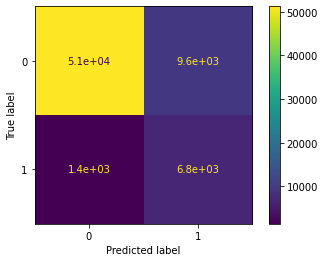

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix

nb_model.fit(X_train_vec,y_train)
y_pred = nb_model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[0,1])
disp.plot();


In [15]:
y_pred.sum()

16343.0

In [16]:
y_test.sum()

8214.0